In [191]:
import pandas as pd
Test_Animal=pd.read_csv('Ffinal_animal_test_features.csv')
Train_Animal=pd.read_csv('Ffinal_animal_train_features.csv')

Test_Tree=pd.read_csv('Ffinal_tree_test_features.csv')
Train_Tree=pd.read_csv('Ffinal_tree_train_features.csv')

Test_Myth=pd.read_csv('Ffinal_myth_test_features.csv')
Train_Myth=pd.read_csv('Ffinal_myth_train_features.csv')

Train_Animal.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
Test_Animal.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

Train_Tree.columns=[0,1,2,3,4,5,6,7,8,9,10,11]
Test_Tree.columns=[0,1,2,3,4,5,6,7,8,9,10,11]

Train_Myth.columns=[0,1,2,3,4,5,6,7,8,9]
Test_Myth.columns=[0,1,2,3,4,5,6,7,8,9]


In [193]:
my_list = [4, 105, 84, 27, 98, 88, 18, 65, 9, 2, 5, 49, 99, 69, 86, 67, 7, 28, 78, 70, 74]

# Sort the list in descending order
sorted_list = sorted(my_list, reverse=False)
print(sorted_list)

test_animal_copy=Test_Animal.copy()
test_animal_copy['nodes_identity']=sorted_list

test_tree_copy=Test_Tree.copy()
test_tree_copy['nodes_identity']=sorted_list

test_myth_copy=Test_Myth.copy()
test_myth_copy['nodes_identity']=sorted_list
# Create a list of numbers from 0 to 105 excluding the numbers in the original list
new_list = [num for num in range(106) if num not in my_list]

print(new_list)

train_animal_copy=Train_Animal.copy()
train_animal_copy['nodes_identity']=new_list

train_tree_copy=Train_Tree.copy()
train_tree_copy['nodes_identity']=new_list

train_myth_copy=Train_Myth.copy()
train_myth_copy['nodes_identity']=new_list    

[2, 4, 5, 7, 9, 18, 27, 28, 49, 65, 67, 69, 70, 74, 78, 84, 86, 88, 98, 99, 105]
[0, 1, 3, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 68, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 100, 101, 102, 103, 104]


In [194]:
import cv2
import matplotlib.pyplot as plt

def display_selected_images(folder_path, indices):
    for idx in indices:
        file_path = f"{folder_path}/{idx}.jpg"
        # Read the image using OpenCV
        img = cv2.imread(file_path, 1)
        
        if img is not None:
            # Convert image from BGR to RGB (Matplotlib expects RGB)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Display the image using Matplotlib
            plt.imshow(img_rgb)
            plt.axis('off')  # Turn off axis labels
            plt.show()
        else:
            print(f"Image {file_path} not found")

# Folder path where images are located
#folder_path = '/Users/anushkatiwari/Downloads/Documents/Phd_Research/ProjectData/sorted_data'

# Indices of the images to display
#indices_to_display = [45, 8, 10]

# Display the selected images
#display_selected_images(folder_path, indices_to_display)


User Selected Preferences are : 


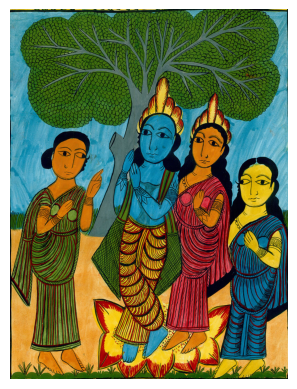

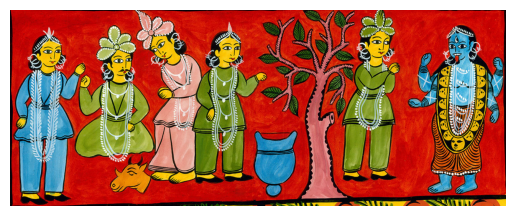

[{105.0: 0.7072202508504429}, {65.0: 1.0}]


ValueError: not enough values to unpack (expected 2, got 1)

In [184]:
import numpy as np
from numpy.linalg import norm

print("User Selected Preferences are : ")
display_selected_images(folder_path, indices_of_1)
indices_of_1=[18,74]
smlrty=[]
for i in indices_of_1:
    list={}
    if i in new_list:
        A = train_copy[train_copy['nodes_identity']==i].values.tolist()[0]
        A = A[:-1]
        A = [float(x) for x in A]
    else:
        A=test_copy[test_copy['nodes_identity']==i].values.tolist()[0]
        A = A[:-1]        
        A = [float(x) for x in A]
    #print(A)     
    for train in range(0,85):        
        B=train_copy.iloc[train].tolist()
        B=B[:-1]
        B = [float(x) for x in B]

        CS=np.dot(A,B)/(norm(A)*norm(B))
        NI=train_copy.iloc[train]['nodes_identity']
        if NI not in indices_of_1:
            list[NI]=CS
    for test in range(0,21):
        #if test==9:
        B=test_copy.iloc[test].tolist()
        #print(test,B)
        B=B[:-1]
        #print(B)
        #print(A)
        CS=np.dot(A,B)/(norm(A)*norm(B))  
        #print("Cosine Similarity",CS)
        NI=test_copy.iloc[test]['nodes_identity']
        if NI not in indices_of_1:
            list[NI]=CS 
            
    smlrty.append(list) 

result = []
recommended=[]
for d in smlrty:
    sorted_items = sorted(d.items(), key=lambda x: x[1], reverse=True)
    top_2 = dict(sorted_items[:1])
    result.append(top_2)
    
print("Recommended Paintings are : ")
display_selected_images(folder_path, recommended)
    

In [195]:
label_tree = pd.read_csv('labeled_trees.csv')
label_animal = pd.read_csv('labeled_animals.csv')
label_myth = pd.read_csv('labeled_myth.csv')
Tree_nodes=[]
Animal_nodes=[]
Myth_nodes=[]
for i in range(0,106):
    if label_tree['majority_vote'].iloc[i]==1:
        Tree_nodes.append(i)
    if label_animal['majority_vote'].iloc[i]==1:
        Animal_nodes.append(i)
    if label_myth['majority_vote'].iloc[i]==1:
        Myth_nodes.append(i)        

In [196]:
user_preferences = [18,40,50,1,0,6,25]

UP_animal = [element for element in user_preferences if element in Animal_nodes]
UP_tree = [element for element in user_preferences if element in Tree_nodes]
UP_myth = [element for element in user_preferences if element in Myth_nodes]
Number_animal = len(UP_animal)
Number_tree = len(UP_tree)
Number_myth = len(UP_myth)
    
Total = Number_animal + Number_tree +  Number_myth 
Prop_animal =  Number_animal/Total
Prop_tree = Number_tree/Total
Prop_myth = Number_myth/Total

Recc_animal = round(Prop_animal * 7)
Recc_tree = round(Prop_tree * 7)
Recc_myth = round(Prop_myth * 7)

In [222]:
def Concept_Rec(user_preferences,train_copy,test_copy,already_recommended,total_user_preferences): 
    print("User Selected Preferences are : ")              
    display_selected_images(folder_path,user_preferences)         
    smlrty=[]                 
    for i in user_preferences:     
        list={}                
        if i in new_list:                
            A = train_copy[train_copy['nodes_identity']==i].values.tolist()[0]
            A = A[:-1]
            A = [float(x) for x in A]
        else:
            A=test_copy[test_copy['nodes_identity']==i].values.tolist()[0]
            A = A[:-1]        
            A = [float(x) for x in A]
        for train in range(0,85): 
            
            B=train_copy.iloc[train].tolist()
            B=B[:-1]
            B = [float(x) for x in B]

            CS=np.dot(A,B)/(norm(A)*norm(B))
            NI=train_copy.iloc[train]['nodes_identity']
            if NI not in total_user_preferences and NI not in already_recommended:
                list[NI]=CS
        for test in range(0,21):
            B=test_copy.iloc[test].tolist()
            B=B[:-1]
            CS=np.dot(A,B)/(norm(A)*norm(B))  
            NI=test_copy.iloc[test]['nodes_identity']
            if NI not in total_user_preferences and NI not in already_recommended:
                list[NI]=CS 
            
        smlrty.append(list) 

    result = []
    recommended=[]
    
    for d in smlrty:
        sorted_items = sorted(d.items(), key=lambda x: x[1], reverse=True)
        top_2 = dict(sorted_items[:2])
        result.append(top_2)
    #print(result)
    return result

In [223]:
def folk_recommendation(user_preferences):
    UP_animal = [element for element in user_preferences if element in Animal_nodes]
    UP_tree = [element for element in user_preferences if element in Tree_nodes]
    UP_myth = [element for element in user_preferences if element in Myth_nodes]
    Number_animal = len(UP_animal)
    Number_tree = len(UP_tree)
    Number_myth = len(UP_myth)

    print(UP_myth)
    
    Total = Number_animal + Number_tree +  Number_myth 
    Prop_animal =  Number_animal/Total
    Prop_tree = Number_tree/Total
    Prop_myth = Number_myth/Total

    Recc_animal = round(Prop_animal * 7)
    Recc_tree = round(Prop_tree * 7)
    Recc_myth = round(Prop_myth * 7)

    Animal_recommended = []
    if len(UP_animal)!=0:
        recommended=[]
        result = Concept_Rec(UP_animal,train_animal_copy,test_animal_copy,Animal_recommended,user_preferences)
        merged_dict = {k: v for d in result for k, v in result}
        sorted_top_2 = dict(sorted(merged_dict.items(), key=lambda item: item[1], reverse=True)[:Recc_animal])
    #print(sorted_top_2)     
    
        for key,value in sorted_top_2.items():
            recommended.append(int(key))
            Animal_recommended=recommended
        print(recommended)
        print("Recommended Paintings from animal are : ")
        display_selected_images(folder_path, recommended)

    if len(UP_tree)!=0:
        recommended=[]
       
        result = Concept_Rec(UP_tree,train_tree_copy,test_tree_copy,Animal_recommended,user_preferences)
        merged_dict = {k: v for d in result for k, v in result}
        sorted_top_2 = dict(sorted(merged_dict.items(), key=lambda item: item[1], reverse=True)[:Recc_tree])
    
        for key,value in sorted_top_2.items():
            recommended.append(int(key))
            Animal_recommended.append(int(key))
        print(recommended)
        print("Recommended Paintings from tree are : ")
        display_selected_images(folder_path, recommended)    

    if len(UP_myth)!=0:
        recommended=[]
       
        result = Concept_Rec(UP_myth,train_myth_copy,test_myth_copy,Animal_recommended,user_preferences)
        merged_dict = {k: v for d in result for k, v in result}
        sorted_top_2 = dict(sorted(merged_dict.items(), key=lambda item: item[1], reverse=True)[:Recc_myth])
    
        for key,value in sorted_top_2.items():
            recommended.append(int(key))
        print(recommended)
        print("Recommended Paintings from myth are : ")
        display_selected_images(folder_path, recommended) 

    #print("User Selected Preferences are : ")              
    #display_selected_images(folder_path,user_preferences)         
    #smlrty=[]                 
    #for i in UP_animal:     
    #    list={}                
    #    if i in new_list:                
    #        A = train_copy[train_copy['nodes_identity']==i].values.tolist()[0]
    #        A = A[:-1]
    #        A = [float(x) for x in A]
    #    else:
    #        A=test_copy[test_copy['nodes_identity']==i].values.tolist()[0]
    #        A = A[:-1]        
    #        A = [float(x) for x in A]
    #    for train in range(0,85): 
            
    #        B=train_copy.iloc[train].tolist()
    #        B=B[:-1]
    #        B = [float(x) for x in B]

     #       CS=np.dot(A,B)/(norm(A)*norm(B))
     #       NI=train_copy.iloc[train]['nodes_identity']
     #       if NI not in user_preferences:
     #           list[NI]=CS
     #   for test in range(0,21):
     #       B=test_copy.iloc[test].tolist()
     #       B=B[:-1]
      #      CS=np.dot(A,B)/(norm(A)*norm(B))  
      #      NI=test_copy.iloc[test]['nodes_identity']
      #      if NI not in user_preferences:
      #          list[NI]=CS 
            
       # smlrty.append(list) 

    #result = []
    #recommended=[]
    
    #for d in smlrty:
    #    sorted_items = sorted(d.items(), key=lambda x: x[1], reverse=True)
    #    top_2 = dict(sorted_items[:2])
    #    result.append(top_2)
    #print(result)
    #merged_dict = {k: v for d in result for k, v in result}
    #sorted_top_2 = dict(sorted(merged_dict.items(), key=lambda item: item[1], reverse=True)[:Recc_animal])
    #print(sorted_top_2)     
    
    #for key,value in sorted_top_2.items():
    #    recommended.append(int(key))
    #print(recommended)
    #print("Recommended Paintings are : ")
    #display_selected_images(folder_path, recommended)
    return recommended

[1, 0]
User Selected Preferences are : 


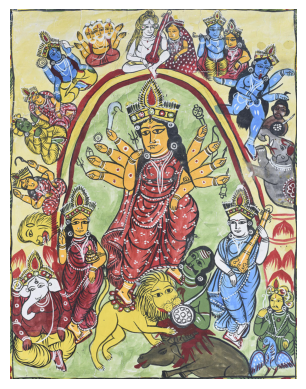

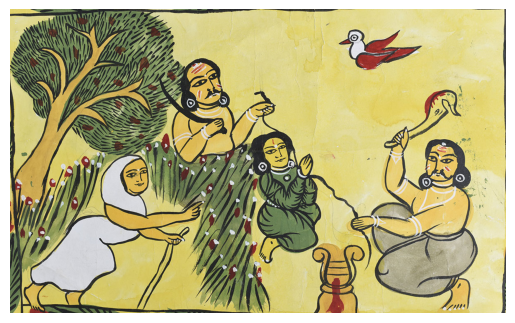

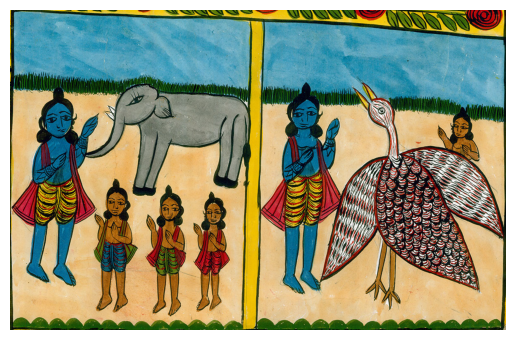

[44, 32]
Recommended Paintings from animal are : 


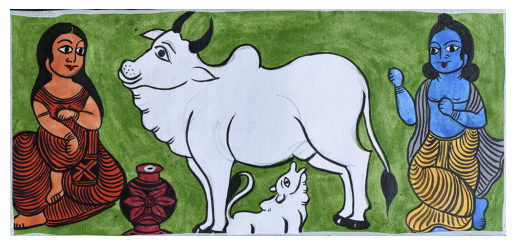

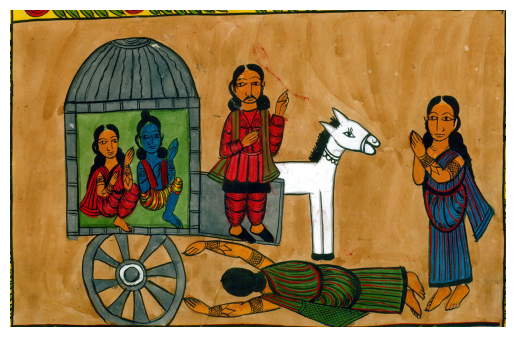

User Selected Preferences are : 


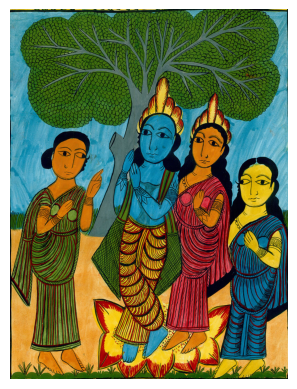

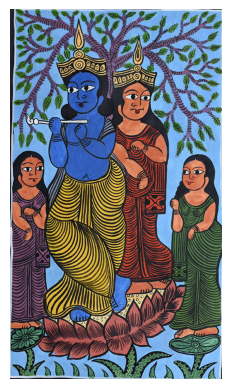

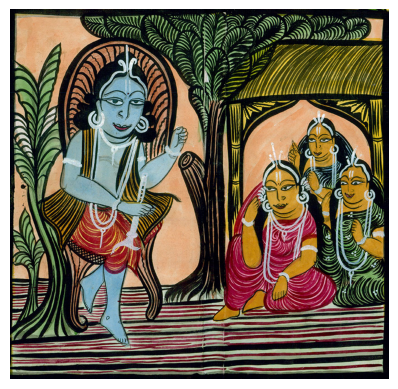

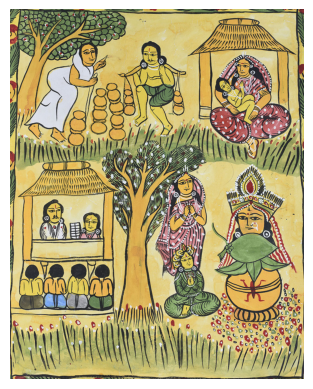

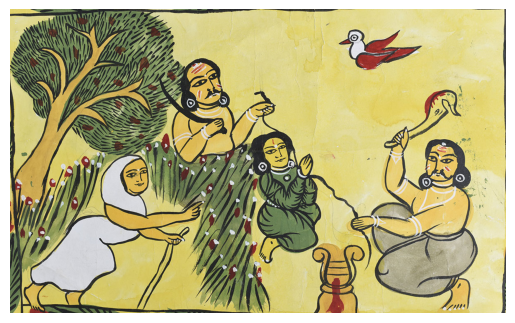

[103, 20, 42, 10]
Recommended Paintings from tree are : 


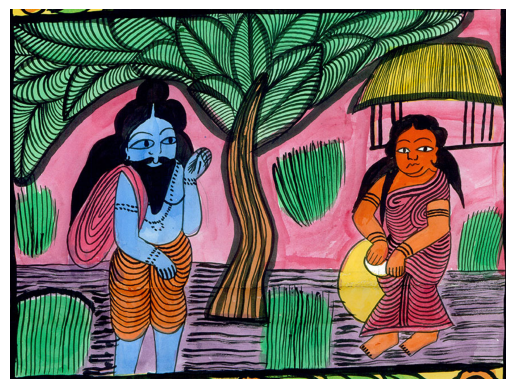

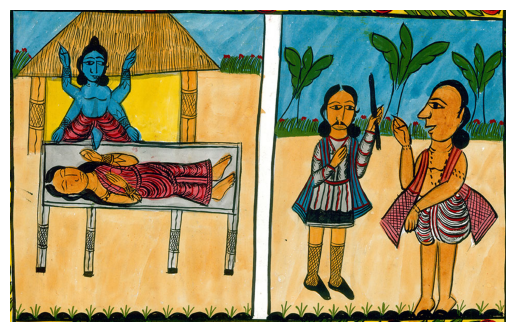

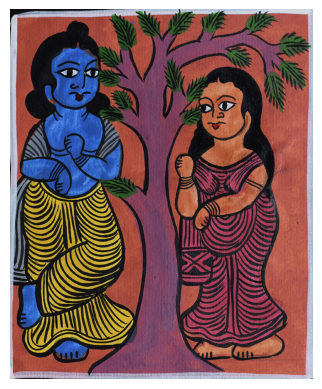

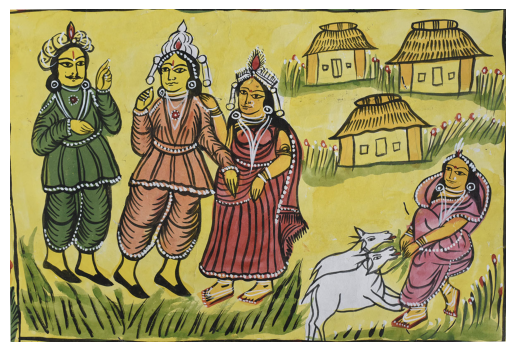

User Selected Preferences are : 


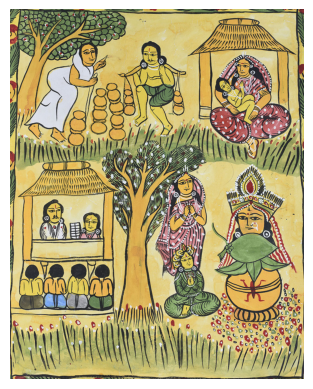

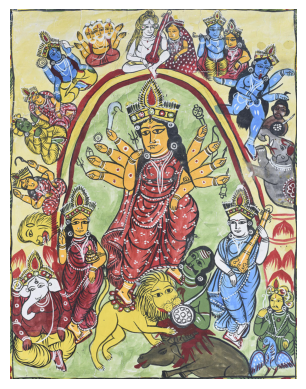

[13]
Recommended Paintings from myth are : 


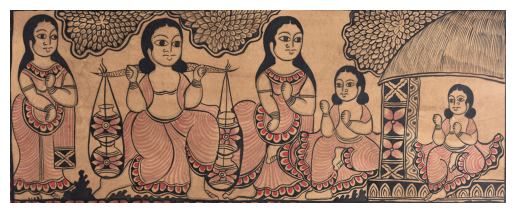

[13]

In [225]:
user_preferences = [18,40,50,1,0,6,25]
folk_recommendation(user_preferences)

In [ ]:
Dict = {[0,1,2,3,4,5,6,7,8,9,10,11],[12,13,14,15,16,17],[18,19,20,21,22,23,24,25,26,27,28,29,30,31,32],[33,34,35,36,37,38,39],
        [40,41,42,43,44,45,46,47,48],[49,50,51,52,53,54,55,56],[57,58,59,60,61,62],[63,64,65,66,67,68,69,70,71,72,73,74,75,76],
        [77,78,79,80,81,82,83],[84,85,86,87,88],[89,90,91,92],[93,94,95,96,97],[98,99,100,101,102,103,104,105]}

In [157]:
result 

[{105.0: 0.7072202508504429, 89.0: 0.63727293713535}, {65.0: 1.0, 67.0: 1.0}]

User Selected Preferences are : 


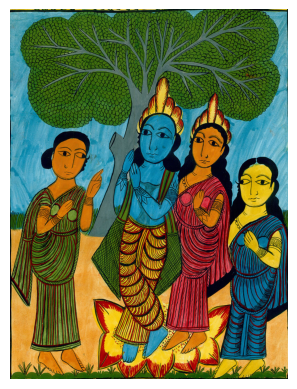

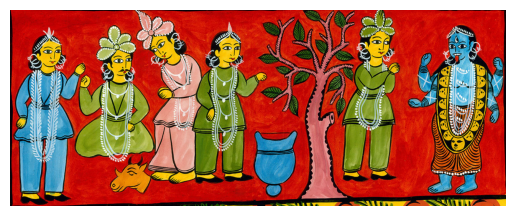

Recommended Paintings are : 


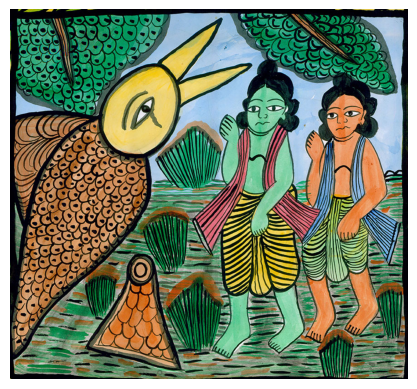

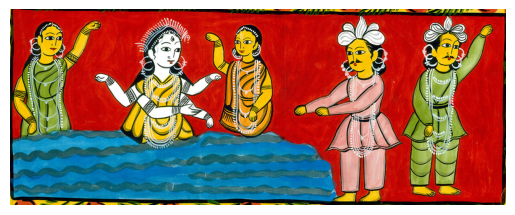

In [163]:
print("User Selected Preferences are : ")
display_selected_images(folder_path, indices_of_1)
indices_of_1=[18,74]
smlrty=[]
for i in indices_of_1:
    list={}
    if i in new_list:
        A = train_copy[train_copy['nodes_identity']==i].values.tolist()[0]
        A = A[:-1]
        A = [float(x) for x in A]
    else:
        A=test_copy[test_copy['nodes_identity']==i].values.tolist()[0]
        A = A[:-1]        
        A = [float(x) for x in A]
    #print(A)     
    for train in range(0,85):        
        B=train_copy.iloc[train].tolist()
        B=B[:-1]
        B = [float(x) for x in B]

        CS=np.dot(A,B)/(norm(A)*norm(B))
        NI=train_copy.iloc[train]['nodes_identity']
        if NI not in indices_of_1:
            list[NI]=CS
    for test in range(0,21):
        #if test==9:
        B=test_copy.iloc[test].tolist()
        #print(test,B)
        B=B[:-1]
        #print(B)
        #print(A)
        CS=np.dot(A,B)/(norm(A)*norm(B))  
        #print("Cosine Similarity",CS)
        NI=test_copy.iloc[test]['nodes_identity']
        if NI not in indices_of_1:
            list[NI]=CS 
            
    smlrty.append(list) 

result = []
recommended=[]
for d in smlrty:
    sorted_items = sorted(d.items(), key=lambda x: x[1], reverse=True)
    top_2 = dict(sorted_items[:2])
    result.append(top_2)
    
#print(result)  

for key,value in result:
    recommended.append(int(key))

print("Recommended Paintings are : ")
display_selected_images(folder_path, recommended)
    

In [159]:
data = [{105.0: 0.7072202508504429}, {89.0: 0.63727293713535}, {65.0: 1.0}, {67.0: 1.0}]

# Merge dictionaries into one
merged_dict = {k: v for d in data for k, v in d.items()}

# Sort the merged dictionary by values and get the top 2 key-value pairs
sorted_top_2 = dict(sorted(merged_dict.items(), key=lambda item: item[1], reverse=True)[:2])

print(sorted_top_2)

{65.0: 1.0, 67.0: 1.0}


In [162]:
temp=[]
for key,value in sorted_top_2.items():
    temp.append(int(key))
print(temp)   

[65, 67]


In [124]:
result = []
recommended=[]
for d in smlrty:
    sorted_items = sorted(d.items(), key=lambda x: x[1], reverse=True)
    top_2 = dict(sorted_items[:2])
    result.append(top_2)
    
print(result)  

for key,value in result:
    recommended.append(int(key))



[{105.0: 0.7072202508504429, 89.0: 0.63727293713535}, {65.0: 1.0, 67.0: 1.0}]


In [125]:
recommended

[105, 65]

In [108]:
A=test_copy.iloc[13]
B=test_copy.iloc[9]

CS=np.dot(A,B)/(norm(A)*norm(B))

CS

0.9998557554428126

In [104]:
A

[0.457685172557831,
 -0.221817314624786,
 2.8239631652832,
 3.75444865226746,
 3.77541542053223,
 -0.842317223548889,
 3.00248861312866,
 2.20926356315613,
 -0.9183589220047,
 2.79381418228149,
 -0.912245154380798,
 -0.822017848491669,
 4.32293653488159,
 -0.812627673149109,
 -0.714988052845001,
 1.983482837677,
 0.00743687152862549,
 -0.481844127178192]

In [105]:
B

[0.457685172557831,
 -0.221817314624786,
 2.8239631652832,
 3.75444865226746,
 3.77541542053223,
 -0.842317223548889,
 3.00248861312866,
 2.20926356315613,
 -0.9183589220047,
 2.79381418228149,
 -0.912245154380798,
 -0.822017848491669,
 4.32293653488159,
 -0.812627673149109,
 -0.714988052845001,
 1.983482837677,
 0.00743687152862549,
 -0.481844127178192]

In [ ]:
indices_of_1=[18,74]
smlrty=[]
for i in indices_of_1:
    list={}
    if i in new_list:
        A = train_copy[train_copy['nodes_identity']==i].values.tolist()[0]
        A = A[:-1]
        A = [float(x) for x in A]
    else:
        A=test_copy[test_copy['nodes_identity']==i].values.tolist()[0]
        A = A[:-1]        
        A = [float(x) for x in A]
        
    for train in range(0,85):
        B=train_copy.iloc[train].tolist()
        B=B[:-1]
        B = [float(x) for x in B]

        CS=np.dot(A,B)/(norm(A)*norm(B))
        NI=train_copy.iloc[train]['nodes_identity']
        list[NI]=CS
    for test in range(0,21):
        B=test_copy.iloc[test].tolist()
        print(test,B)
        B=B[:-1]
        CS=np.dot(A,B)/(norm(A)*norm(B))  
        NI=test_copy.iloc[test]['nodes_identity']
        list[NI]=CS 
    smlrty.append(list) 

result = []
for d in smlrty:
    sorted_items = sorted(d.items(), key=lambda x: x[1], reverse=True)
    top_2 = dict(sorted_items[:3])
    result.append(top_2)
print(result)



In [2]:
import random

# Define the number of users and total items
num_users = 2000
total_items = 106
max_interactions = 15

# Generate a random user_item_dict
user_item_dict = {}
for user_id in range(1, num_users + 1):
    # Generate a random number of items the user interacts with (between 1 and max_interactions)
    num_interactions = random.randint(5, max_interactions)
    
    # Generate a random list of items the user interacts with (item IDs are between 1 and total_items)
    interactions = random.sample(range(1, total_items + 1), num_interactions)
    
    # Assign the interactions to the user
    user_item_dict[user_id] = interactions

# Print the user_item_dict
print(user_item_dict)


{1: [78, 48, 1, 37, 97, 88, 20, 101, 99, 51, 2, 49, 4], 2: [73, 67, 32, 71, 23, 86, 98, 34, 69, 18], 3: [78, 47, 12, 54, 35], 4: [81, 30, 23, 67, 55, 5, 52, 93], 5: [68, 32, 4, 53, 20, 29, 84, 75, 1, 25, 14, 35], 6: [102, 95, 35, 93, 28, 49], 7: [31, 102, 29, 54, 57, 40, 87, 69], 8: [83, 70, 40, 98, 28, 61, 66, 85, 97, 20, 12, 41, 59], 9: [99, 78, 54, 87, 28], 10: [10, 19, 46, 69, 7, 50, 81, 37, 27, 97, 8, 6, 94, 21, 63], 11: [73, 57, 30, 60, 70, 52, 88, 41, 56, 46, 2, 12], 12: [19, 75, 70, 51, 92, 78, 3, 71, 13, 57, 12, 2, 22], 13: [91, 7, 57, 37, 99, 47, 41, 52, 46, 83, 49], 14: [14, 18, 3, 44, 81, 46, 48, 84, 16, 12, 106, 69, 11], 15: [39, 88, 38, 3, 53, 87, 24, 90], 16: [73, 89, 41, 74, 61, 58, 65, 18, 47, 80, 76, 30], 17: [69, 11, 36, 10, 1, 29, 90, 80, 103], 18: [82, 2, 3, 70, 103, 21, 51, 9, 27, 33, 86], 19: [87, 40, 99, 26, 44, 98, 65, 80, 29], 20: [78, 49, 39, 7, 101, 32, 95, 44, 54, 62, 106, 10, 91, 67, 22], 21: [104, 94, 61, 18, 35, 48, 46, 33, 15, 10, 59, 82, 99, 73], 22: [

In [10]:
import numpy as np
np.save('user_item_dict.npy', user_item_dict)

# Verify the saved file by loading it back
loaded_dict = np.load('user_item_dict.npy', allow_pickle=True).item()
print(loaded_dict)

{1: [79, 63, 3, 9, 23, 28, 41], 2: [44, 72, 1, 3, 76], 3: [59, 98, 56, 63, 51, 50], 4: [20, 5, 66], 5: [90, 40, 80, 98, 33, 12, 42, 75, 93], 6: [46, 39, 56], 7: [93, 27, 72, 45, 21], 8: [106, 73, 101], 9: [23, 21, 94, 31, 41, 97, 30, 27, 84, 65], 10: [36, 85, 28, 99, 1, 101, 32, 11, 70], 11: [83, 93, 90, 22], 12: [9, 76, 92, 21, 80, 63, 54, 100, 26], 13: [22], 14: [46], 15: [23, 78, 29, 85], 16: [23, 11, 52, 49, 53, 37, 2, 60, 18, 31], 17: [74, 71, 46], 18: [95, 7, 13, 68, 103, 20, 45], 19: [103, 16, 78, 99, 66], 20: [35, 36, 54, 16, 14, 59, 81, 9, 7], 21: [87, 26], 22: [17], 23: [81, 57, 15, 93, 82], 24: [81, 28, 71, 104, 11, 106], 25: [5, 49, 51, 75, 82, 71, 44, 80], 26: [38, 58, 97], 27: [25, 46, 43, 101, 96, 41, 27], 28: [89, 57, 77, 94, 58, 55, 34, 103, 43], 29: [9, 20, 32, 23, 103, 64, 16], 30: [52, 6, 101, 41, 78], 31: [28, 54], 32: [25, 85, 104, 12], 33: [9, 60, 13, 91, 3], 34: [77, 8, 22, 96, 28], 35: [80, 88], 36: [94, 42, 52, 104, 68, 91, 86, 44, 82], 37: [15, 91, 35, 64, 6,

In [8]:
for values in user_item_dict.items():
    print(values)

(1, [79, 63, 3, 9, 23, 28, 41])
(2, [44, 72, 1, 3, 76])
(3, [59, 98, 56, 63, 51, 50])
(4, [20, 5, 66])
(5, [90, 40, 80, 98, 33, 12, 42, 75, 93])
(6, [46, 39, 56])
(7, [93, 27, 72, 45, 21])
(8, [106, 73, 101])
(9, [23, 21, 94, 31, 41, 97, 30, 27, 84, 65])
(10, [36, 85, 28, 99, 1, 101, 32, 11, 70])
(11, [83, 93, 90, 22])
(12, [9, 76, 92, 21, 80, 63, 54, 100, 26])
(13, [22])
(14, [46])
(15, [23, 78, 29, 85])
(16, [23, 11, 52, 49, 53, 37, 2, 60, 18, 31])
(17, [74, 71, 46])
(18, [95, 7, 13, 68, 103, 20, 45])
(19, [103, 16, 78, 99, 66])
(20, [35, 36, 54, 16, 14, 59, 81, 9, 7])
(21, [87, 26])
(22, [17])
(23, [81, 57, 15, 93, 82])
(24, [81, 28, 71, 104, 11, 106])
(25, [5, 49, 51, 75, 82, 71, 44, 80])
(26, [38, 58, 97])
(27, [25, 46, 43, 101, 96, 41, 27])
(28, [89, 57, 77, 94, 58, 55, 34, 103, 43])
(29, [9, 20, 32, 23, 103, 64, 16])
(30, [52, 6, 101, 41, 78])
(31, [28, 54])
(32, [25, 85, 104, 12])
(33, [9, 60, 13, 91, 3])
(34, [77, 8, 22, 96, 28])
(35, [80, 88])
(36, [94, 42, 52, 104, 68, 91, 8

In [11]:
import numpy as np

# Load the user_item_dict
user_item_dict = np.load('user_item_dict.npy', allow_pickle=True).item()

# Generate train_edge list
train_edge = []
for user_id, items in user_item_dict.items():
    for item_id in items:
        train_edge.append((user_id, item_id))

# Convert to numpy array
train_edge = np.array(train_edge)

# Save the train_edge as a .npy file
np.save('train_edge.npy', train_edge)

# Verify the saved file by loading it back
loaded_train_edge = np.load('train_edge.npy')
print(loaded_train_edge)


[[   1   79]
 [   1   63]
 [   1    3]
 ...
 [2000   59]
 [2000   63]
 [2000   33]]


In [2]:
import numpy as np

# Step 1: Load the CSV file
csv_file_path = 'Image_features_VGG.csv'
data = np.genfromtxt(csv_file_path, delimiter=',')

# Step 2: Save the data as an NPY file
npy_file_path = 'Image_features_VGG.npy'
np.save(npy_file_path, data)

In [3]:
import numpy as np

# Step 1: Load the CSV file
csv_file_path = 'Text_features_BOW.csv'
data = np.genfromtxt(csv_file_path, delimiter=',')

# Step 2: Save the data as an NPY file
npy_file_path = 'Text_features_BOW.npy'
np.save(npy_file_path, data)